Load BlueSky posts

In [82]:
import pandas as pd
from tensorflow.keras.models import load_model
import pickle 
import numpy as np

In [2]:
df_BS = pd.read_pickle('bluesky.pkl')

Prepare data for RNN

In [3]:
print(df_BS.columns)

Index(['type', 'text', 'created_at', 'author', 'author_did', 'uri',
       'embedded_array', 'langs', 'reply_to'],
      dtype='object')


In [4]:
print(df_BS.head(10))

   type                                               text  \
0  post                                     0------------0   
1  post  Gonna play a little game: how many plates can ...   
2  post                                          Lmaoooooo   
3  post               Ice has returned. Nature is healing.   
4  post                                  Happy Birthday :3   
5  post                                                 <3   
6  post                                  Happy Birthday :3   
7  post                Base Cyllene is only 20% suppressed   
8  post      Cyllene (100% / True Form)\nConcept Art no. 1   
9  post                                Concept Art (No. 2)   

                 created_at  \
0  2024-11-29T08:45:17.496Z   
1  2024-11-28T13:08:22.358Z   
2  2024-11-29T13:43:03.668Z   
3  2024-11-29T15:13:58.901Z   
4  2024-11-28T12:50:46.709Z   
5  2024-11-29T00:49:50.089Z   
6  2024-11-29T13:35:42.051Z   
7  2024-11-29T06:18:00.928Z   
8  2024-11-29T12:27:41.470Z   
9  2024

In [5]:
print(type(df_BS))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(len(df_BS))
df_BS = df_BS.dropna(subset=['text'])
df_BS = df_BS.drop_duplicates(subset=['text'])
print(df_BS.head(100))

2023778
     type                                               text  \
0    post                                     0------------0   
1    post  Gonna play a little game: how many plates can ...   
2    post                                          Lmaoooooo   
3    post               Ice has returned. Nature is healing.   
4    post                                  Happy Birthday :3   
..    ...                                                ...   
113  post  Here's the tea! The #sinistea to be exact! A m...   
114  post                                                  😎   
115  post                   This is my supercharged 4 banger   
116  post                            #orchids #paphiopedilum   
117  post  paph whitemoor "snow maiden' at peak whiteness. 🌱   

                   created_at  \
0    2024-11-29T08:45:17.496Z   
1    2024-11-28T13:08:22.358Z   
2    2024-11-29T13:43:03.668Z   
3    2024-11-29T15:13:58.901Z   
4    2024-11-28T12:50:46.709Z   
..                       

In [37]:
df_sample = df_BS.sample(n=2000, random_state=42)
df = df_sample.reset_index(drop=True)
df.to_csv('bluesky.csv')

In [38]:
print(len(df))

2000


In [67]:

df = pd.read_csv('BS_with_labels.csv',sep=(';'))


In [69]:
print(df.head(10))

   id  type                                               text  emotion
0  18  post  I hope my friends in the US are having a good ...        2
1  26  post  Who? Seriously. We can't watch anymore unless ...        5
2  63  post                             I miss himðŸ˜­ðŸ˜­ðŸ˜­        0
3  64  post  cute! I have a pair that looks a lot like them...        1
4  66  post  How cool! Those letters spell out Kamala!!! Pe...        1
5  70  post  Maybe not as emotional as it could have been, ...        1
6  72  post  You should be in hells kitchen or MasterChef l...        1
7  74  post                           Good morning! ðŸ˜ƒâ¤ï¸        1
8  76  post  Can we all just agree on ONE social media plat...        3
9  78  post                      Gravy will never be the same.        0


In [70]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


def clean_text(text):
    text = str(text)
    text = text.lower()                                         # Convert to lowercase
    text = re.sub(r'\d+', '', text)                             # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)                         # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()                    # Remove extra whitespace
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tugbagozlek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
df['clean_text']= df['text'].apply(clean_text)


In [77]:
print(df['clean_text'].head(50))

0                   hope friend us good thanksgiv ðÿƒðÿ
1     serious cant watch anymor unless pay disney wo...
2                                        miss himðÿðÿðÿ
3          cute pair look lot like cute best style obvi
4                      cool letter spell kamala perfect
5         mayb emot could solid interpret enjoy conduct
6                        hell kitchen masterchef lol ðÿ
7                                       good morn ðÿƒâï
8     agre one social media platform us stop post ex...
9                                           gravi never
10                                one least favorit pie
11                         lmao right doesnt clue ignor
12                                        puppi get big
13    feel realli proud bc shoe got rip week actual ...
14                                   happi yam sham day
15       banana split ice cream warm blueberri pop tart
16                             follow sinc got pleas fb
17                                       predict

In [79]:
df = df.dropna(subset=['clean_text'])

In [80]:
print(len(df))

200


In [83]:

with open('tokenizer.pkl', 'rb') as f:  
    tokenizer = pickle.load(f)


with open('max_sequence_length.pkl', 'rb') as f:  
    max_sequence_length = pickle.load(f)

In [84]:
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Indlæs tokenizeren fra filen

    
sequences = tokenizer.texts_to_sequences(df['clean_text'].to_list())

sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [85]:
model = load_model("RNN_final.h5")

Predict on BlueSky posts

In [86]:
predictions= model.predict(sequences_padded)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
[[0.16459522 0.27366343 0.06470821 0.14184204 0.26218224 0.09300892]
 [0.27700177 0.23191108 0.0268677  0.18188187 0.2270017  0.05533589]
 [0.30360636 0.16605829 0.03301017 0.21040206 0.23642781 0.05049531]
 [0.02282637 0.94527286 0.0092906  0.00829896 0.00912331 0.00518789]
 [0.30746412 0.20116685 0.0326     0.18708913 0.21818544 0.05349444]
 [0.35969844 0.18357062 0.03118809 0.16284028 0.2098964  0.05280612]
 [0.20891401 0.38739032 0.0384676  0.14075021 0.16844644 0.05603138]
 [0.31893244 0.18326388 0.02705466 0.19598007 0.22546482 0.04930409]
 [0.3783644  0.28946236 0.03780545 0.12415113 0.13045862 0.03975812]
 [0.28927493 0.15319361 0.02471159 0.22175418 0.26176775 0.04929794]
 [0.35141447 0.18306676 0.02982035 0.18734251 0.20177011 0.04658581]
 [0.3237712  0.15451597 0.03065686 0.21369441 0.2286562  0.04870535]
 [0.22239372 0.18972287 0.02820773 0.2216577  0.28020108 0.0578169 ]
 [0.1261062  0.3295397  0.35931668 0.06939672 0.07132746 0.044313

In [122]:
result=[]

#predictions = predictions.tolist()
for emotions in predictions:
    emotion = np.argmax(emotions)
    result.append(emotion)


In [123]:
print(result)

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 0, 4, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 4, 0, 4, 0, 4, 4, 0, 0, 1, 0, 0, 1, 0, 0, 1, 4, 0, 1, 0, 0, 0, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 4, 0, 0, 1, 0, 4, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0]


In [124]:
df['predictions'] = result

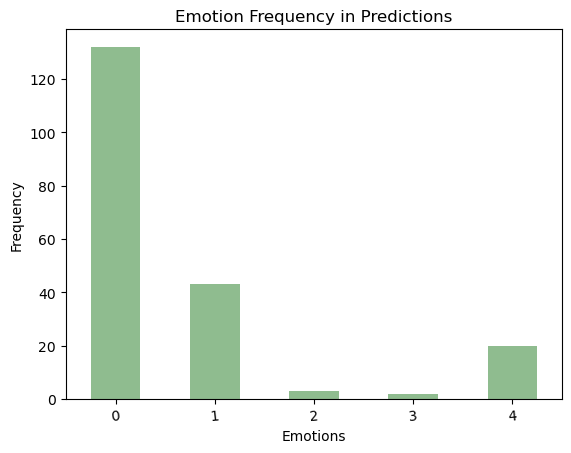

In [143]:
import pandas as pd
import matplotlib.pyplot as plt



# Lav histogrammet
df['predictions'].value_counts().sort_index().plot(kind='bar',color='darkseagreen')

plt.xticks(rotation=5)
# Tilføj labels og titel
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Emotion Frequency in Predictions')

# Vis grafen
plt.show()

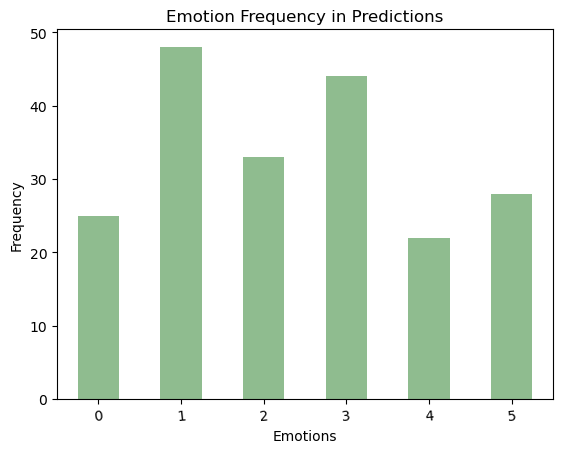

In [145]:
import pandas as pd
import matplotlib.pyplot as plt



# Lav histogrammet
df['emotion'].value_counts().sort_index().plot(kind='bar',color='darkseagreen')

plt.xticks(rotation=5)
# Tilføj labels og titel
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Emotion Frequency in Predictions')

# Vis grafen
plt.show()

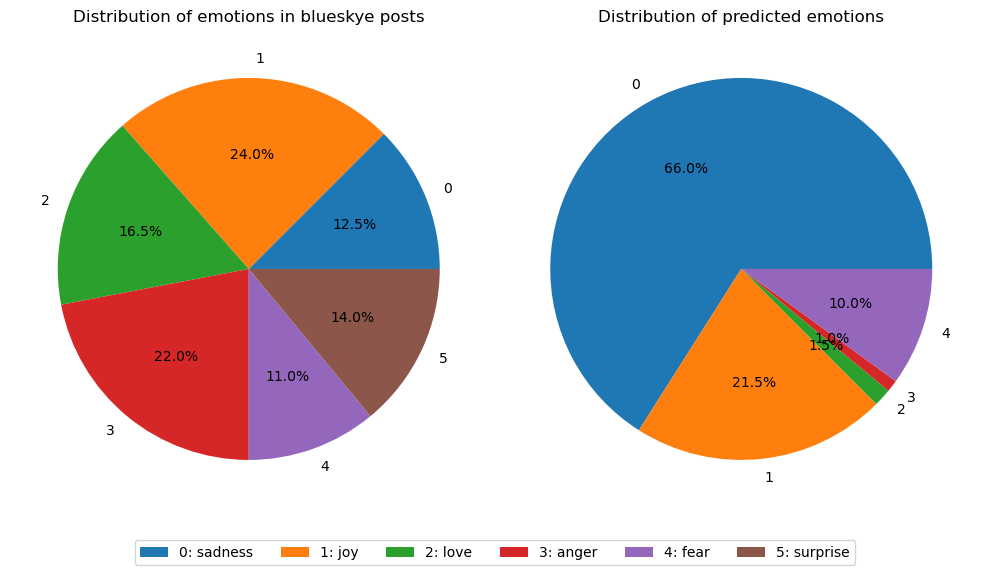

In [168]:
# Data
groups_1 = df.groupby('emotion')['text'].count()
groups_2 = df.groupby('predictions')['text'].count()

label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5:'surprise'}

# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Bar chart 1
axes[0].pie(groups_1.values, labels=list(groups_1.index),autopct='%1.1f%%')
axes[0].set_title('Distribution of emotions in blueskye posts')

# Bar chart 2
axes[1].pie(groups_2.values, labels=list(groups_2.index),autopct='%1.1f%%')
axes[1].set_title('Distribution of predicted emotions')

# Add a legend below
plt.figlegend([f'{key}: {value}' for key, value in label_mapping.items()], loc='lower center', ncol=6)


# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()